In [1064]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Softmax
import random
import geopandas as gpd
import country_converter as coco
from tensorflow.keras.utils import plot_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score

In [1065]:
df = pd.read_csv("C:\\Users\\terre\OneDrive - University of Cape Town\\Online Lecture\\CSC4025Z\\Assignment\\Assignment 2\\ds_salaries.csv")

In [1066]:
# Display dataframe and basic information regarding columns
display(df)
df.info()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [1067]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [1068]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [1069]:
df.duplicated().sum()

1171

In [1070]:
df.drop_duplicates(keep='first',inplace = True)
df.duplicated().sum()

0

In [1071]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [1072]:
# Check for NaN values and the number of unique values
print("Are there any NaN values: ", df.isnull().values.any())
print(df.nunique())

Are there any NaN values:  False
work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


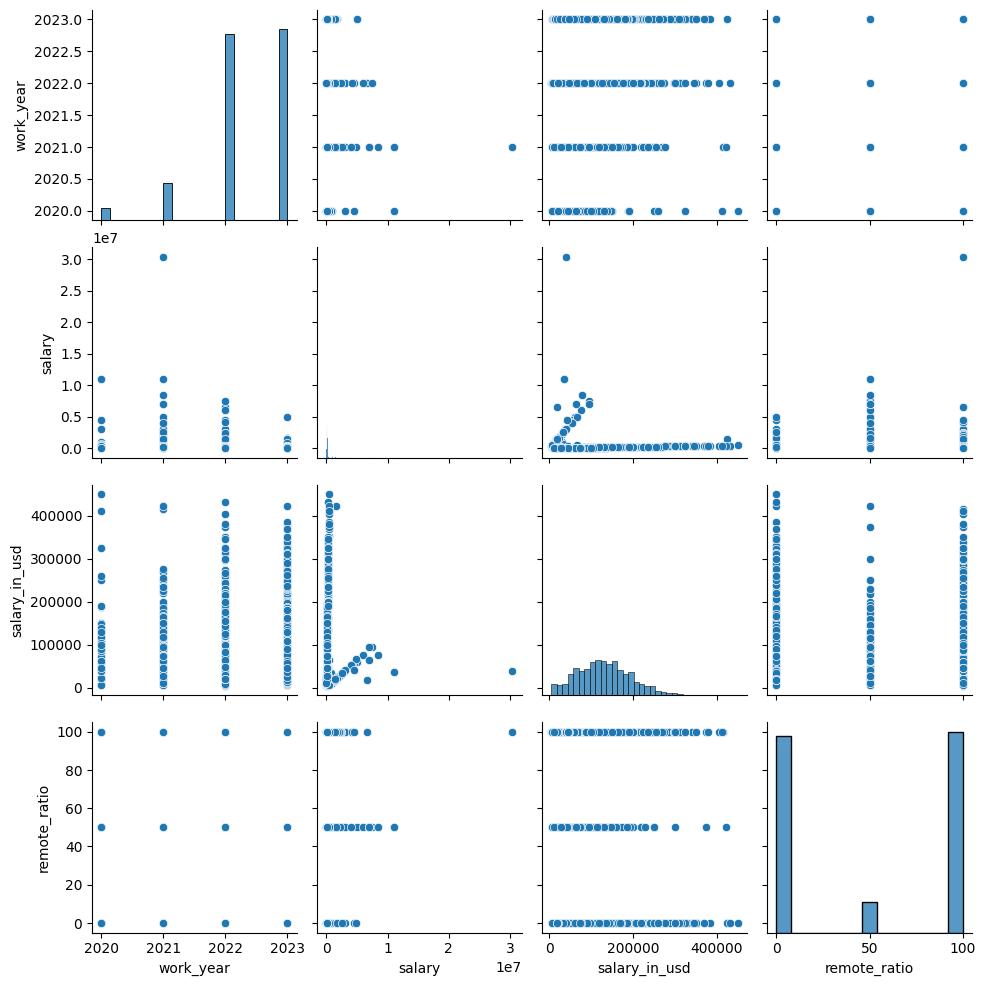

In [1073]:
sns.pairplot(df)

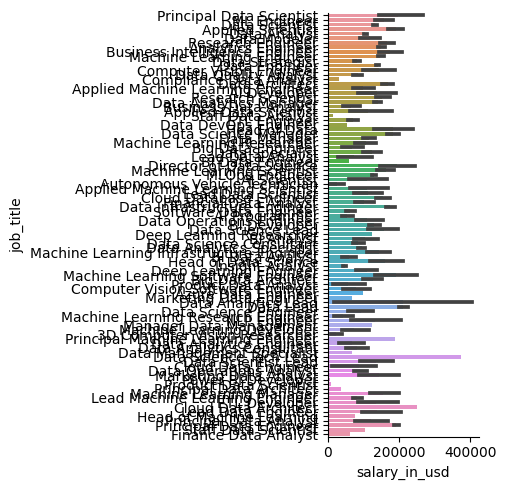

In [1074]:
sns.catplot(x = 'salary_in_usd', y = 'job_title',data = df,kind = 'bar')

<Axes: xlabel='salary_in_usd', ylabel='employment_type'>

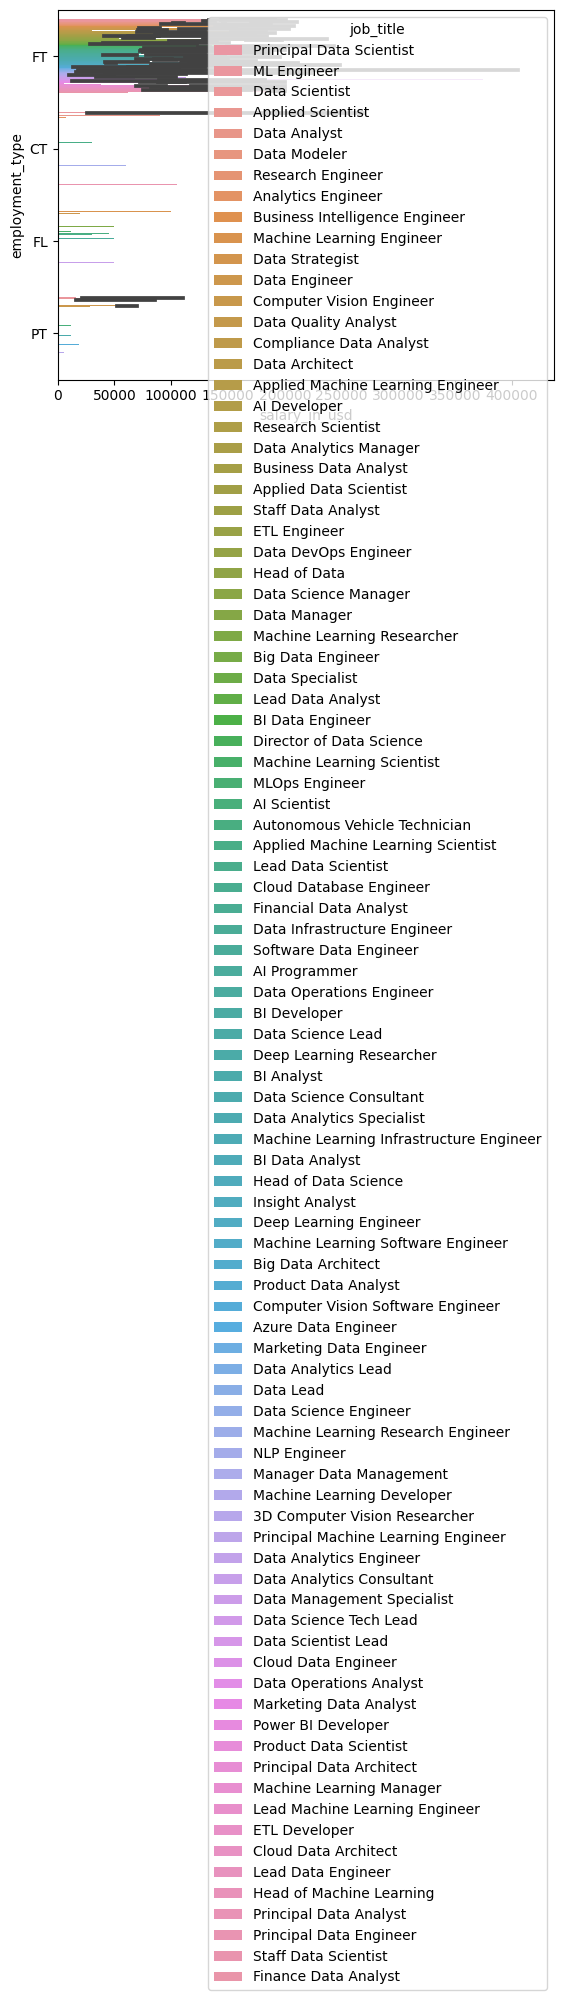

In [1075]:
sns.barplot(x = 'salary_in_usd', y = 'employment_type',data = df, hue = 'job_title')

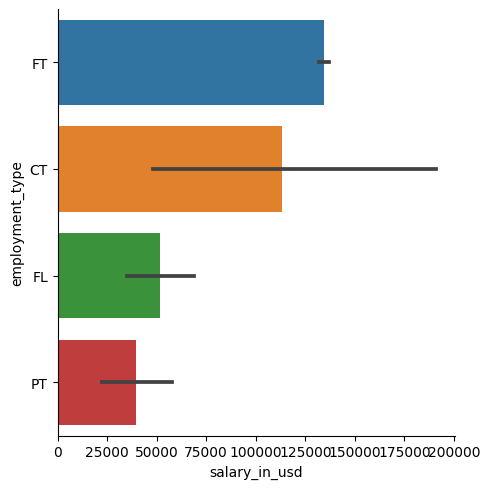

In [1076]:
sns.catplot(data = df, x = 'salary_in_usd',y = 'employment_type', kind = 'bar')

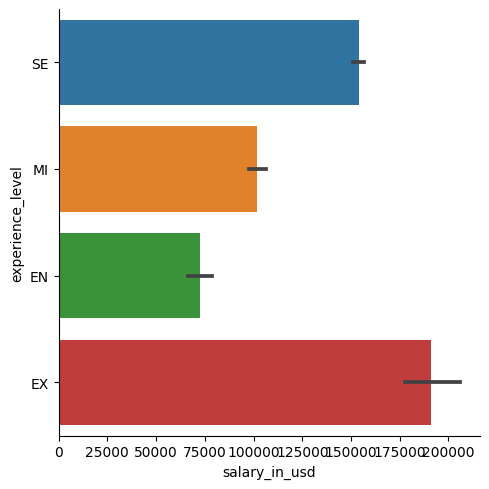

In [1077]:
sns.catplot(data = df, x = 'salary_in_usd', y = 'experience_level',kind = 'bar')

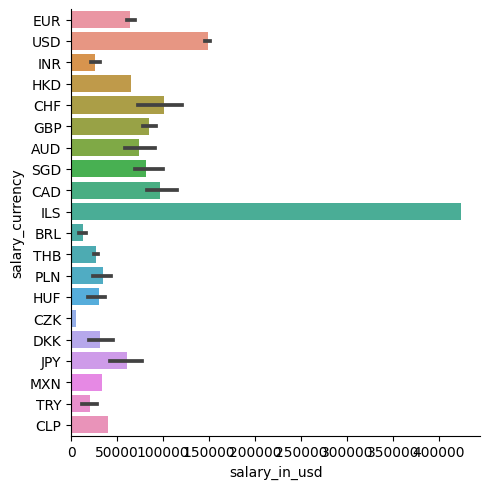

In [1078]:
sns.catplot(data = df, x = 'salary_in_usd', y = 'salary_currency', kind = 'bar')

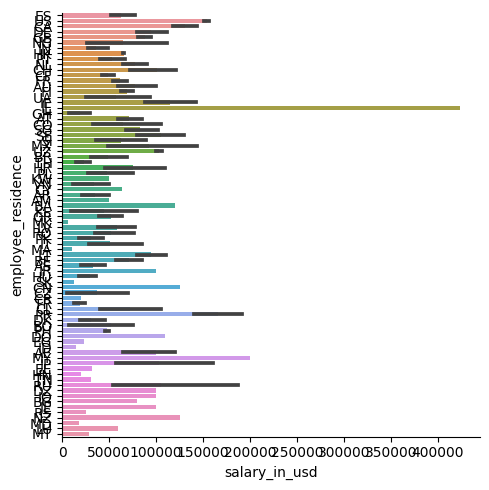

In [1079]:
sns.catplot(data = df, x ='salary_in_usd', y = 'employee_residence', kind = 'bar')

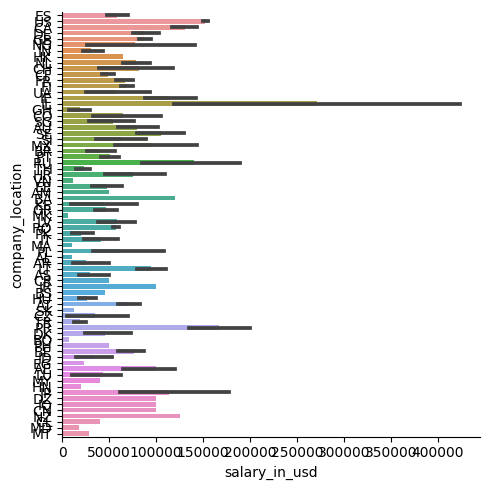

In [1080]:
sns.catplot(x = 'salary_in_usd', y = 'company_location',kind = 'bar', data = df)

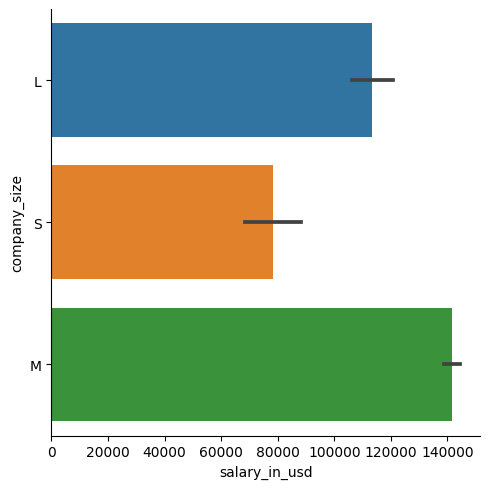

In [1081]:
sns.catplot(data = df, x = 'salary_in_usd', y = 'company_size', kind = 'bar')

In [1082]:
# Look through unique values in each categorical column
categorical_cols = df.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
    print(f"{col}", f"Number of unique entries: {len(df[col].unique().tolist())},")
    print(df[col].unique().tolist())

experience_level Number of unique entries: 4,
['SE', 'MI', 'EN', 'EX']
employment_type Number of unique entries: 4,
['FT', 'CT', 'FL', 'PT']
job_title Number of unique entries: 93,
['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer', 'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist', 'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist', 'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer', 'AI Sci

In [1083]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [1084]:
def plot_bar_chart(df_column, x_label='', y_label='', title='', whole_numbers_only=False, count_labels=True, as_percentage=True):
    if whole_numbers_only:
        df_column = df_column[df_column % 1 == 0]
    plt.figure(figsize=(12, 8))
    y = [num for (s, num) in df_column.value_counts().items()]
    x = [s for (s, num) in df_column.value_counts().items()]
    ax = plt.bar(x, y, color='blue', alpha=0.5)
    try:
        plt.xticks(range(x[-1], x[0] + 1))
    except:
        pass
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if count_labels:
        df_col = df_column.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        for idx, (year, value) in enumerate(df_column.value_counts().items()):
            if as_percentage == False:
                plt.annotate(f'{value}\n', xy=(year, value), ha='center', va='center')
            else:
                plt.annotate(f'{df_col[year]}\n', xy=(year, value), ha='center', va='center')
    plt.show()

In [1085]:
def plot_top_n_bar_chart(df_column, n, x_label='', y_label='', title='', whole_numbers_only=False, count_labels=True, as_percentage=True):
    if whole_numbers_only:
        df_column = df_column[df_column % 1 == 0]
    plt.figure(figsize=(12, 8))
    y = [num for (s, num) in df_column.value_counts().head(n).items()]
    x = [s for (s, num) in df_column.value_counts().head(n).items()]
    ax = plt.bar(x, y, color='blue', alpha=0.5)
    try:
        plt.xticks(range(x[-1], x[0] + 1))
    except:
        pass
    plt.xlabel(x_label)
    plt.xticks(fontsize=10, rotation=30)
    plt.ylabel(y_label)
    plt.title(title)
    if count_labels:
        df_col = df_column.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        for idx, (year, value) in enumerate(df_column.value_counts().head(n).items()):
            if as_percentage == False:
                plt.annotate(f'{value}\n', xy=(year, value), ha='center', va='center')
            else:
                plt.annotate(f'{df_col[year]}\n', xy=(year, value), ha='center', va='center')
    plt.show()

In [1086]:
def plot_histogram(salaries, bins=10, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(10, 6))
    plt.hist(salaries, bins=bins, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


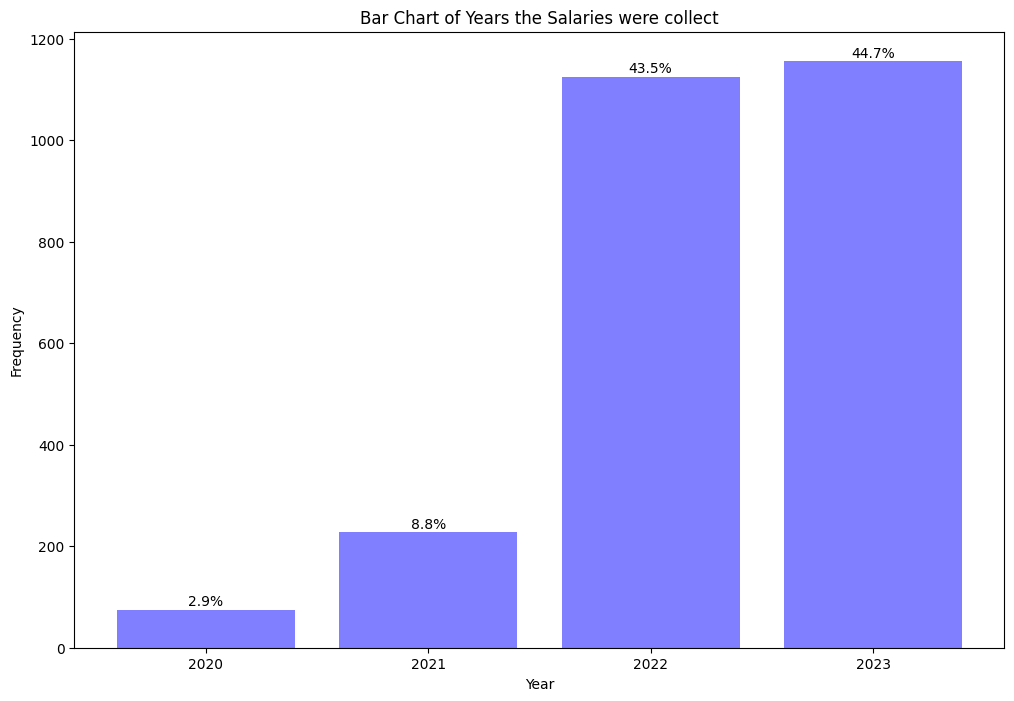

In [1087]:
# Plot
plot_bar_chart(df['work_year'], 'Year', 'Frequency', 'Bar Chart of Years the Salaries were collect', whole_numbers_only = True, count_labels=True)

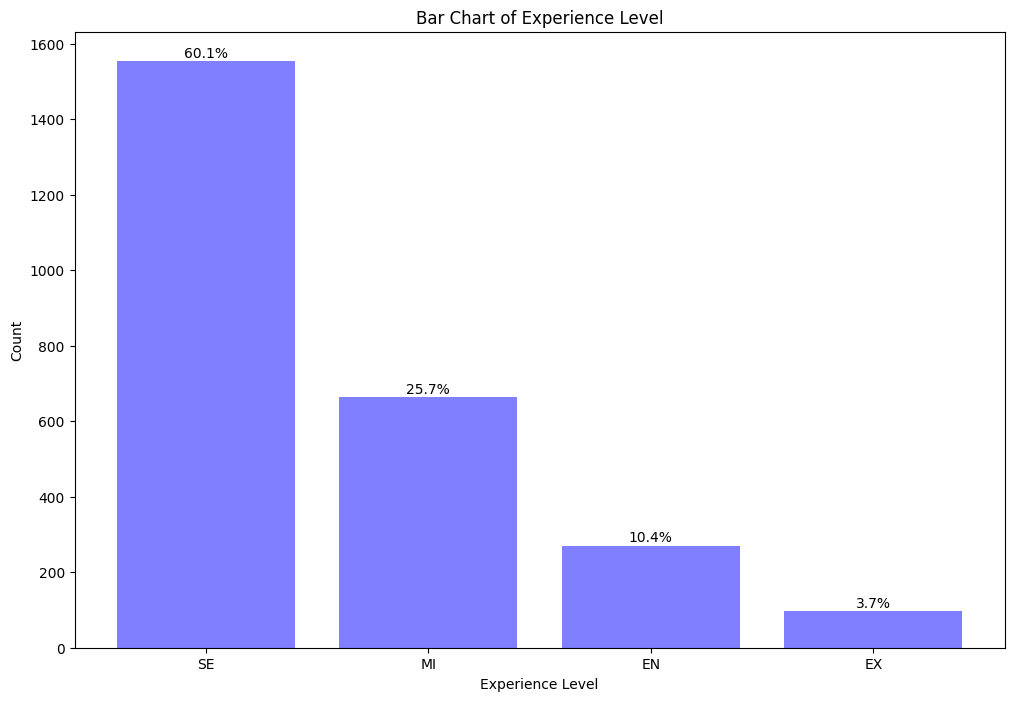

In [1088]:
# Plot
plot_bar_chart(df['experience_level'], 'Experience Level', 'Count', 'Bar Chart of Experience Level', whole_numbers_only = False, count_labels=True)

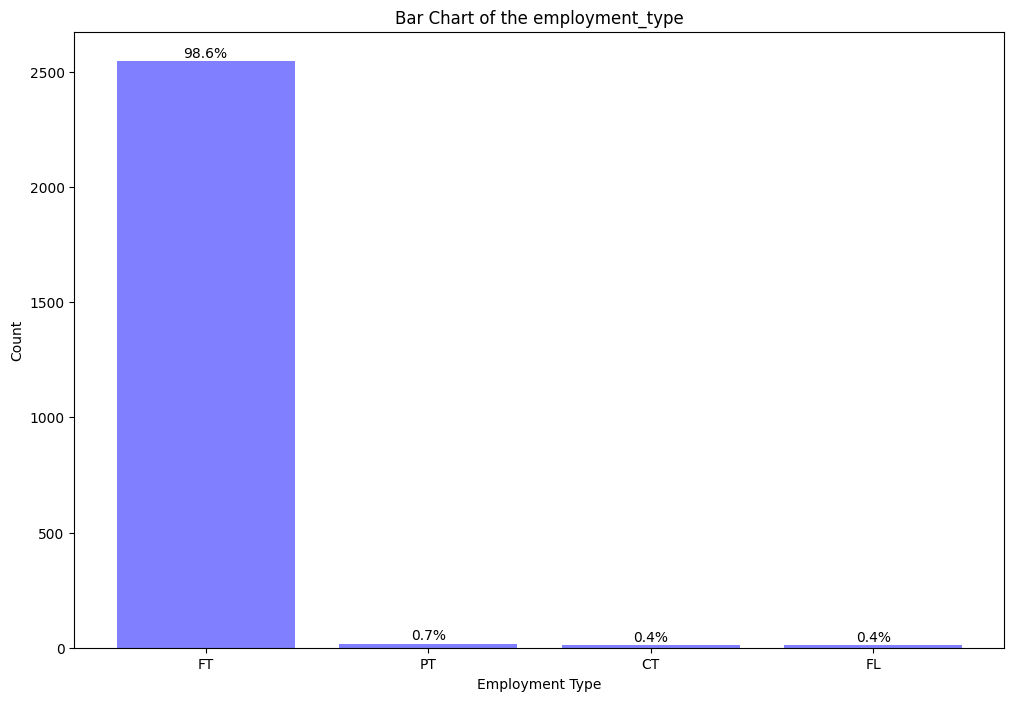

In [1089]:
# Plot
plot_bar_chart(df['employment_type'], 'Employment Type', 'Count', 'Bar Chart of the employment_type', whole_numbers_only = False, count_labels=True)

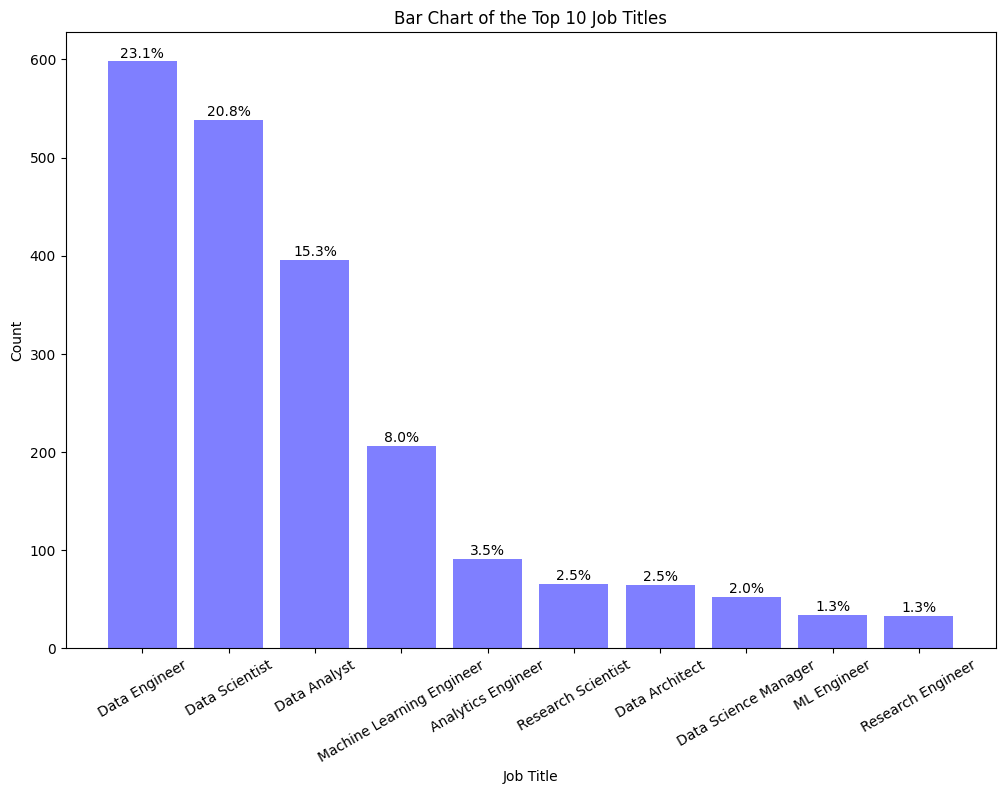

In [1090]:
# Plot
plot_top_n_bar_chart(df['job_title'], 10, x_label='Job Title', y_label='Count', title ='Bar Chart of the Top 10 Job Titles', whole_numbers_only = False, count_labels=True)

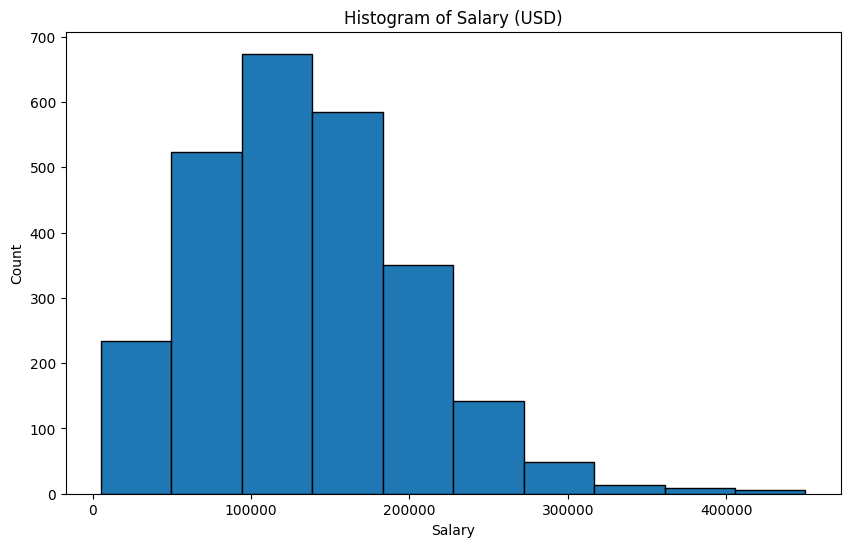

In [1091]:
plot_histogram(df['salary_in_usd'], bins=10, xlabel='Salary', ylabel='Count', title='Histogram of Salary (USD)')

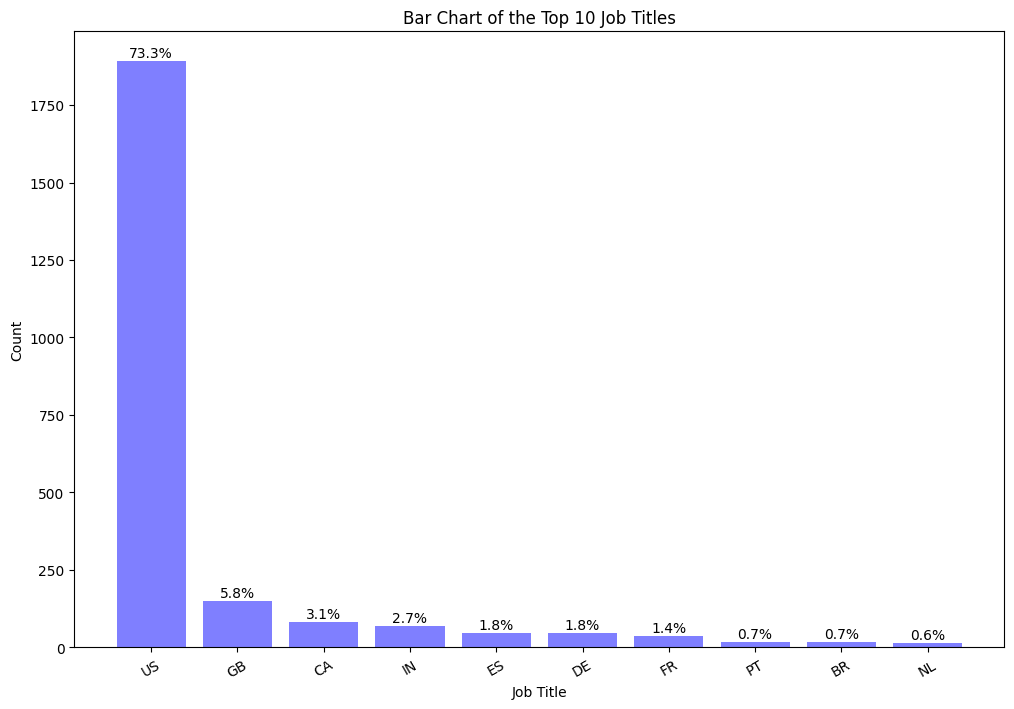

In [1092]:
# Plot
plot_top_n_bar_chart(df['employee_residence'], 10, x_label='Job Title', y_label='Count', title ='Bar Chart of the Top 10 Job Titles', whole_numbers_only = False, count_labels=True)

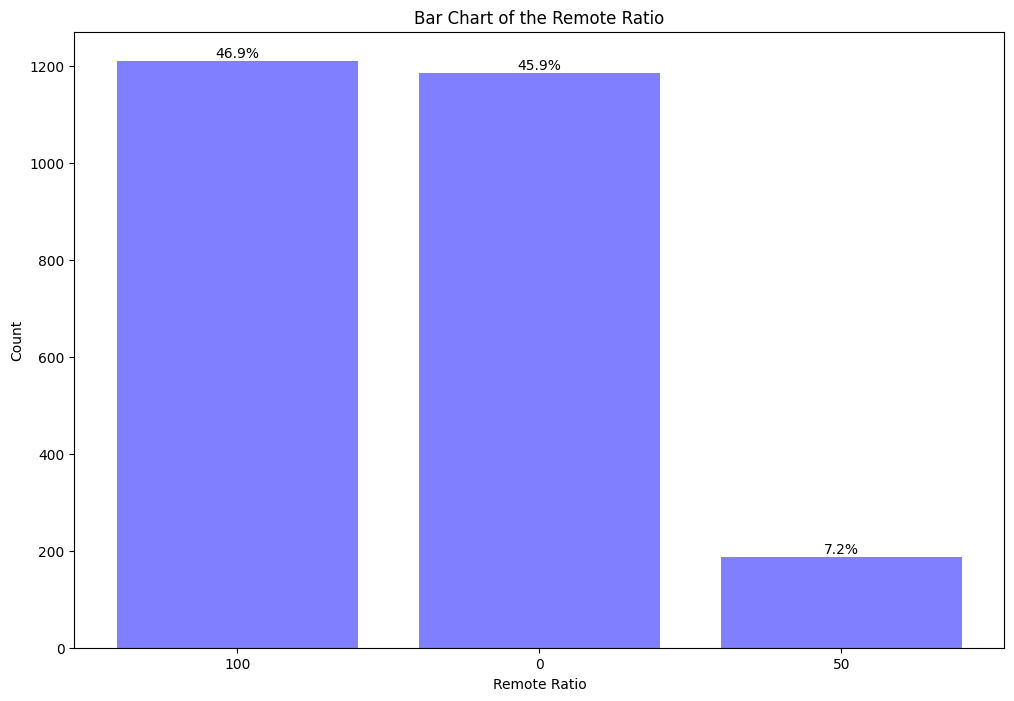

In [1093]:
# Plot
plot_bar_chart(df['remote_ratio'].astype('str'), 'Remote Ratio', 'Count', 'Bar Chart of the Remote Ratio', whole_numbers_only = False, count_labels=True)

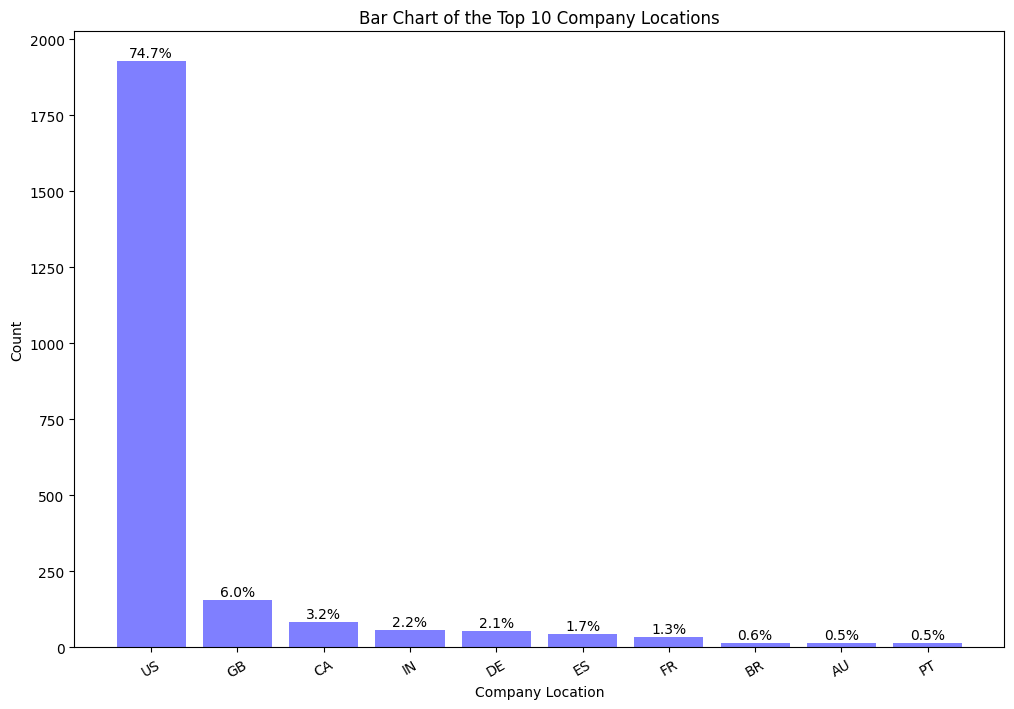

In [1094]:
# Plot
plot_top_n_bar_chart(df['company_location'], 10, x_label='Company Location', y_label='Count', title ='Bar Chart of the Top 10 Company Locations', whole_numbers_only = False, count_labels=True)

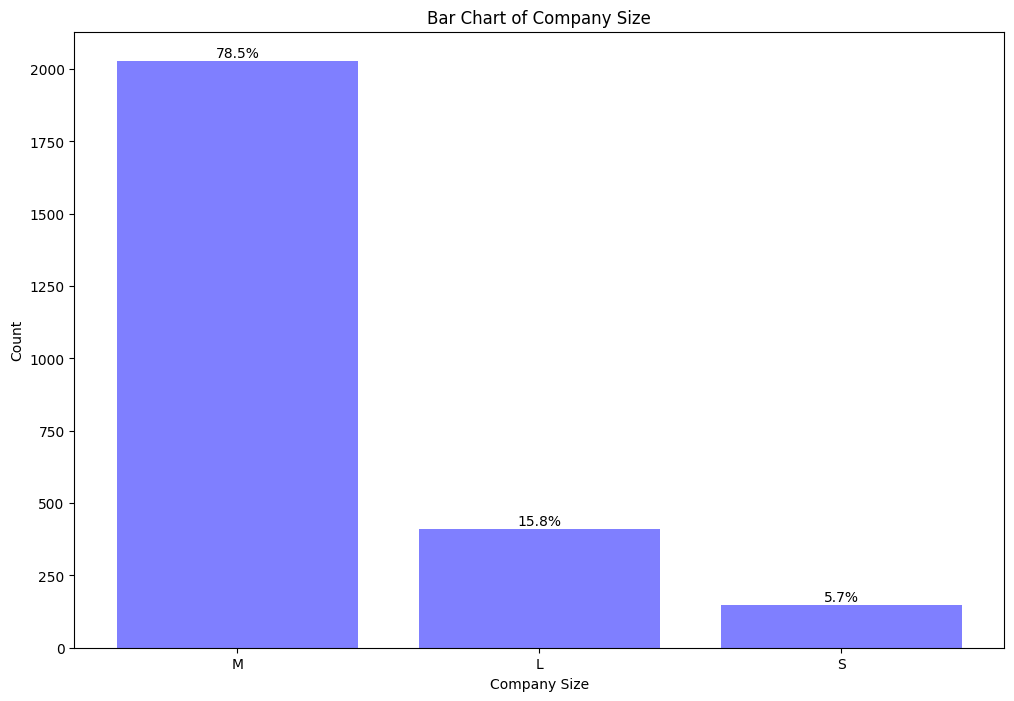

In [1095]:
# Plot
plot_bar_chart(df['company_size'], 'Company Size', 'Count', 'Bar Chart of Company Size', whole_numbers_only = False, count_labels=True)

In [1096]:
def plot_boxplot(dataframe, x_column, y_column, top_n):
    top_x = dataframe[x_column].value_counts().nlargest(top_n).index
    top_x_data = dataframe[dataframe[x_column].isin(top_x)]
    
    plt.figure(figsize=(10, 6))
    plt.boxplot([top_x_data[top_x_data[x_column] == title][y_column] for title in top_x],
                labels=top_x)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Boxplot of Salaries for Top {top_n} Job Titles")
    plt.xticks(rotation=45)
    plt.show()

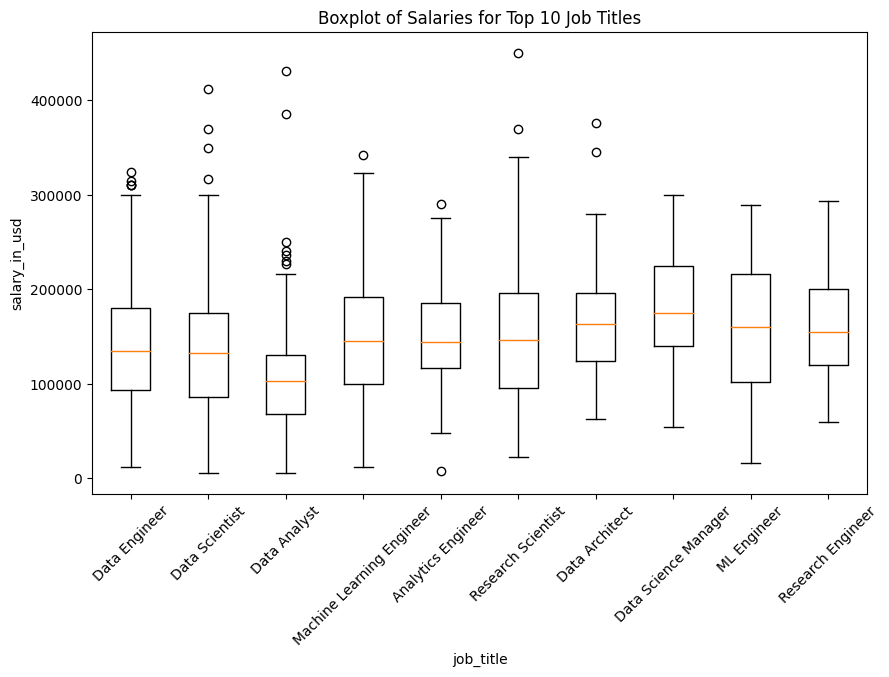

In [1097]:
plot_boxplot(df, 'job_title', 'salary_in_usd', top_n = 10)

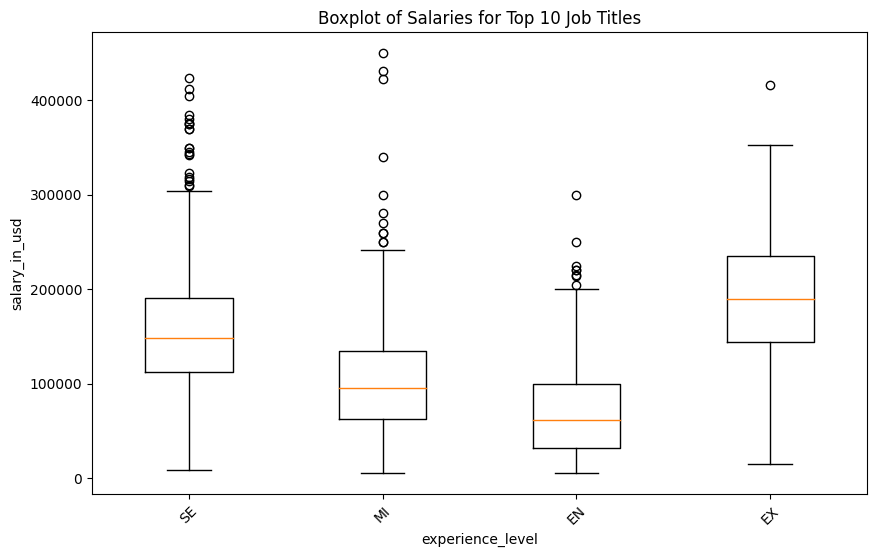

In [1098]:
plot_boxplot(df, 'experience_level', 'salary_in_usd', top_n = 10)

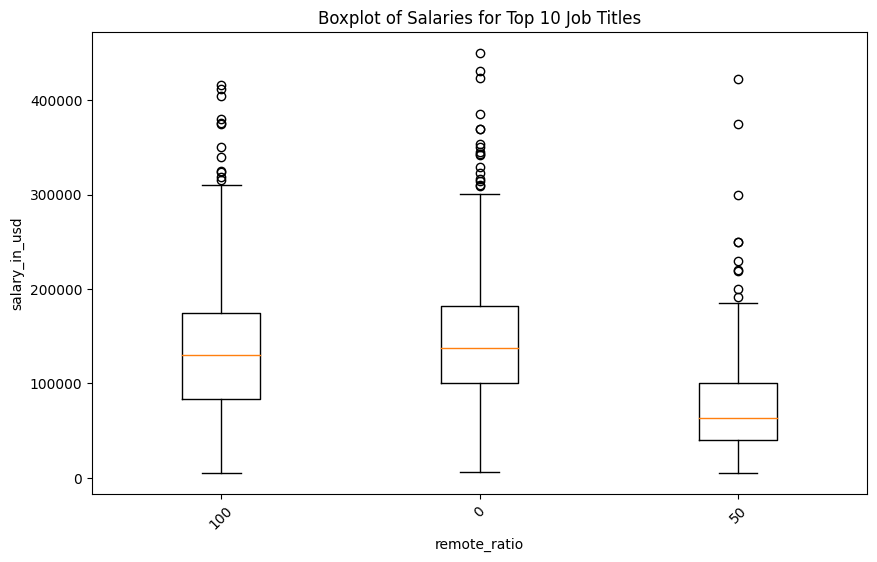

In [1099]:
plot_boxplot(df, 'remote_ratio', 'salary_in_usd', top_n = 10)

C:\Users\terre\AppData\Local\Temp\ipykernel_25252\1659823221.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


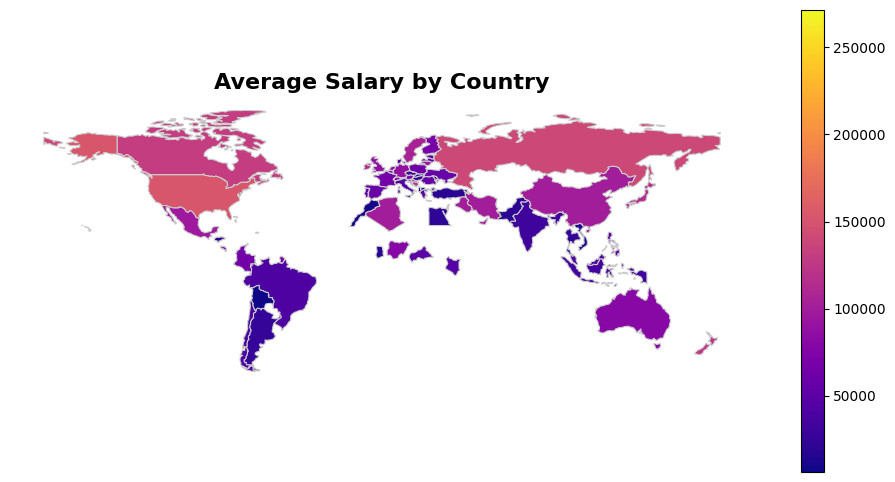

In [1100]:
# Load country boundaries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the DataFrame with the country boundaries based on the 'country' column
geo_df = df.copy()
geo_df['company_location'] = coco.convert(names=df['company_location'], to='ISO3')
average_salary_df = geo_df.groupby('company_location')['salary_in_usd'].mean().reset_index()
merged_data = world.merge(average_salary_df, left_on='iso_a3', right_on='company_location', how='left')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(column='salary_in_usd', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Average Salary by Country', fontdict={'fontsize': '16', 'fontweight': 'bold'})
ax.set_axis_off()

# Show the plot
plt.show()

In [1101]:
# Let's take a look at the top 10 countries with the highest average salary
sorted_average_salary_df = average_salary_df.sort_values(by='salary_in_usd', ascending=False)
sorted_average_salary_df.head(10)

,company_location,salary_in_usd
40,ISR,271446.500000
59,PRI,167500.000000
70,USA,152374.791602
62,RUS,140333.333333
13,CAN,130572.759036
55,NZL,125000.000000
9,BIH,120000.000000
37,IRL,114943.428571
42,JPN,114127.333333
66,SWE,105000.000000


In [1102]:
def encode_categorical_columns(dataframe):
    cat_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
    cols_to_drop = ['salary', 'salary_currency']
    
    # Create a new dataframe with the other columns
    new_dataframe = dataframe.drop(cat_cols + cols_to_drop, axis=1)
    
    # Create a dictionary for each encoder
    encoders = {}
    
    # Iterate through and for each column, encode
    for col in cat_cols:
        encoder = LabelEncoder()
        encoders[col] = encoder
        new_dataframe[col] = encoder.fit_transform(dataframe[col])
    return new_dataframe, encoders

In [1103]:
clean_df, encoders = encode_categorical_columns(df)
clean_df.head()

,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,85847,3,2,84,26,2,25,0
1,2023,30000,2,0,66,75,2,70,2
2,2023,25500,2,0,66,75,2,70,2
3,2023,175000,3,2,47,11,2,12,1
4,2023,120000,3,2,47,11,2,12,1


In [1104]:
def plot_correlation_matrix(dataframe):
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create a mask for the lower triangle
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Plot the correlation matrix
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                annot=True, fmt=".2f", annot_kws={"size": 10})

    # Set the axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Set the plot title
    plt.title("Correlation Matrix")

    # Show the plot
    plt.show()

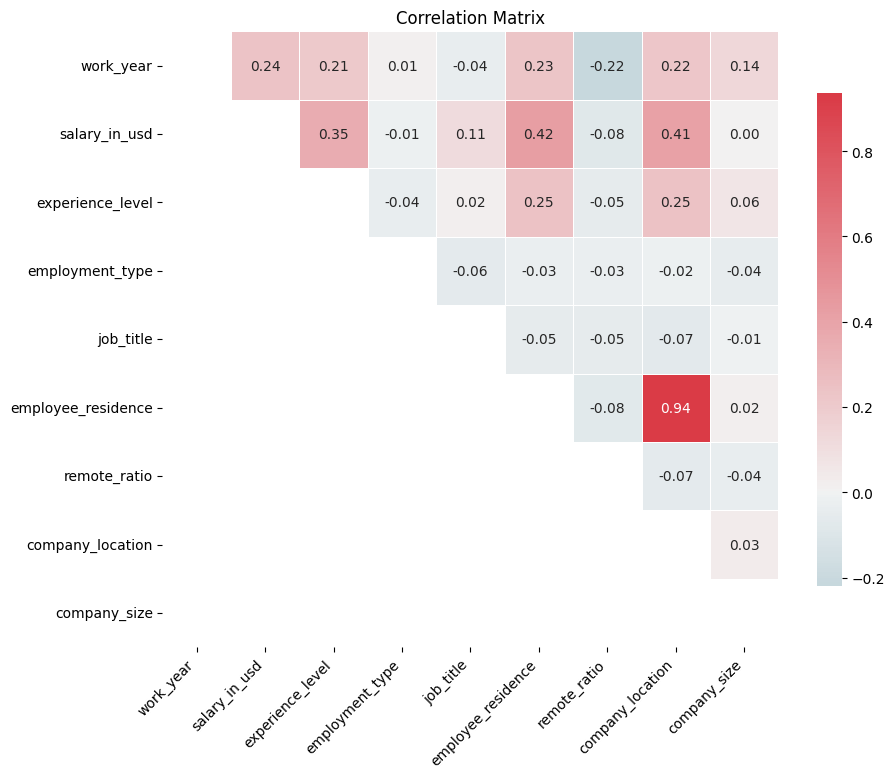

In [1105]:
plot_correlation_matrix(clean_df)

In [1106]:
def split_dataset(dataframe, target_column, test_size=0.2, validation_size=0.2, random_state=None):
    # Separate the features and the target variable
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Calculate the remaining percentage for validation set
    remaining_size = 1 - test_size
    validation_size_adjusted = validation_size / remaining_size

    # Split the training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size_adjusted, random_state=random_state)

    # Return the split datasets
    return X_train, X_val, X_test, y_train, y_val, y_test

In [1107]:
# We will create a generic function to standardize the dataset

def standardize_data(train_X, train_y):
    # Create a StandardScaler object
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()

    # Fit the scaler on the training set and transform the data
    train_X_standardized = scaler_x.fit_transform(train_X)
    train_y_array = np.array(train_y)
    train_y_standardized = scaler_y.fit_transform(train_y_array.reshape((-1,1)))

    # Return the standardized training set, standardized target variable, and the fitted scaler
    return train_X_standardized, train_y_standardized, scaler_x, scaler_y

In [1108]:
def standardize_test_data(test_X, test_y, scaler_X, scaler_y):
    # Transform test_X using the fitted scaler_X
    test_X_standardized = scaler_X.transform(test_X)

    # Convert test_y to a NumPy array and reshape if necessary
    test_y_array = np.array(test_y)
    if len(test_y_array.shape) == 1:
        test_y_array = test_y_array.reshape(-1, 1)

    # Transform test_y using the fitted scaler_y
    test_y_standardized = scaler_y.transform(test_y_array)

    # Flatten the standardized target variable if desired
    test_y_standardized = test_y_standardized.flatten()

    # Return the standardized test set features and standardized target variable
    return test_X_standardized, test_y_standardized

In [1109]:
# Split the data Linear regression for salary_in_usd
train_x, val_x, test_x, train_y, val_y, test_y = split_dataset(clean_df, 'job_title', random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(1550, 8)
(1550,)
(517, 8)
(517,)
(517, 8)
(517,)


In [1110]:
# Standardize the training set
train_x_std, train_y_std, scaler_x, scaler_y = standardize_data(train_x, train_y)
test_x_std, test_y_std = standardize_test_data(test_x, test_y, scaler_x, scaler_y)
val_x_std, val_y_std = standardize_test_data(val_x, val_y, scaler_x, scaler_y)

In [1111]:
# Build and train the model
lin_reg_model = LinearRegression()
lin_reg_model.fit(train_x_std, train_y_std)

LinearRegression()

In [1112]:
#Baseline
# Predict and test
y_pred = lin_reg_model.predict(test_x_std)

# Evaluate the model
mse = mean_squared_error(test_y_std, y_pred)
print("MSE (Loss Function): " + str(mse))

MSE (Loss Function): 0.8408657606947736


In [1113]:
# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y_std, y_pred)
print("MAE: ", mae)

# Calculate R2 Score
r2 = r2_score(test_y_std, y_pred)
print("R2 Score: ", r2)

RMSE:  0.9169873285355549
MAE:  0.7207115323652393
R2 Score:  0.04883874546552758


In [1114]:
def predict_and_plot_difference(model, X_val, y_val, scaler):
    # Predict on the validation set
    predictions = model.predict(X_val)

    # Reshape predictions and actual values
    predictions = predictions.reshape(-1, 1)
    actual_values = y_val.reshape(-1, 1)

    # Undo standardization
    predictions_original = scaler.inverse_transform(predictions)
    actual_values_original = scaler.inverse_transform(actual_values)

    # Calculate differences
    differences = actual_values_original - predictions_original
    differences_percent = differences / actual_values_original * 100

    # Create DataFrame for the results
    df_predictions = pd.DataFrame({
        'Actual': actual_values_original.flatten(), 
        'Predicted': predictions_original.flatten(), 
        'Difference': differences.flatten(), 
        'Difference in %': differences_percent.flatten()})

    # Plot the differences
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(differences)), differences, color='b')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Difference')
    plt.title('Difference between Actual and Predicted Values')
    plt.show()

    return df_predictions, differences.flatten()

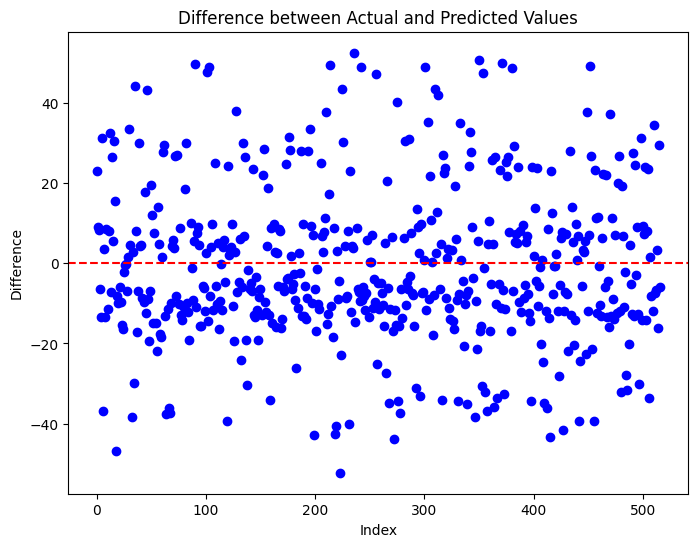

In [1115]:
df_predictions, difference = predict_and_plot_difference(lin_reg_model, val_x_std, val_y_std, scaler_y)

In [1116]:
df_predictions

,Actual,Predicted,Difference,Difference in %
0,69.0,45.972684,23.027316,33.372922
1,47.0,37.995201,9.004799,19.159147
2,47.0,38.805996,8.194004,17.434052
3,33.0,39.398380,-6.398380,-19.389030
4,25.0,38.363691,-13.363691,-53.454763
...,...,...,...,...
512,33.0,39.658369,-6.658369,-20.176876
513,47.0,43.846948,3.153052,6.708622
514,25.0,41.186285,-16.186285,-64.745141
515,69.0,39.477404,29.522596,42.786371


In [1117]:
# Split the data
train_x, val_x, test_x, train_y, val_y, test_y = split_dataset(clean_df, 'job_title', random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(1550, 8)
(1550,)
(517, 8)
(517,)
(517, 8)
(517,)


In [1118]:
# Standardize the training set
train_x_std, train_y_std, scaler_x, scaler_y = standardize_data(train_x, train_y)
test_x_std, test_y_std = standardize_test_data(test_x, test_y, scaler_x, scaler_y)
val_x_std, val_y_std = standardize_test_data(val_x, val_y, scaler_x, scaler_y)

In [1119]:
#Multi-Layered Neaural Network

def get_new_model(input_shape):
    model = Sequential([
        Dense(150, input_shape = input_shape[1:], activation = 'relu', name = 'layer1'),
        # Dense(180, activation = 'relu'),
        # Dense(160, activation = 'relu'),
        # Dense(140, activation = 'relu'),
        # Dense(120, activation = 'relu'),
        # Dense(100, activation = 'relu'),
        Dense(93, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [1120]:
model = get_new_model(train_x.shape)
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 150)               1350      
                                                                 
 dense_17 (Dense)            (None, 93)                14043     
                                                                 
Total params: 15,393
Trainable params: 15,393
Non-trainable params: 0
_________________________________________________________________


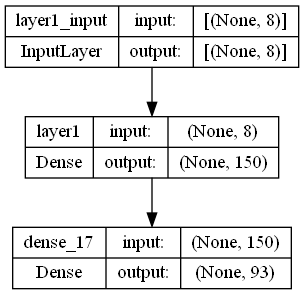

In [1121]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [1122]:
# Fit the model
history = model.fit(train_x_std, train_y, validation_data = (test_x_std, test_y), epochs=35, batch_size=1000)

Epoch 1/35
2/2 [==============================] - 0s 135ms/step - loss: 4.5496 - accuracy: 0.0084 - val_loss: 4.5036 - val_accuracy: 0.0174
Epoch 2/35
2/2 [==============================] - 0s 34ms/step - loss: 4.4866 - accuracy: 0.0194 - val_loss: 4.4477 - val_accuracy: 0.0484
Epoch 3/35
2/2 [==============================] - 0s 46ms/step - loss: 4.4242 - accuracy: 0.0426 - val_loss: 4.3927 - val_accuracy: 0.0658
Epoch 4/35
2/2 [==============================] - 0s 37ms/step - loss: 4.3632 - accuracy: 0.0710 - val_loss: 4.3382 - val_accuracy: 0.1025
Epoch 5/35
2/2 [==============================] - 0s 39ms/step - loss: 4.3024 - accuracy: 0.1071 - val_loss: 4.2843 - val_accuracy: 0.1315
Epoch 6/35
2/2 [==============================] - 0s 37ms/step - loss: 4.2424 - accuracy: 0.1439 - val_loss: 4.2307 - val_accuracy: 0.1509
Epoch 7/35
2/2 [==============================] - 0s 42ms/step - loss: 4.1821 - accuracy: 0.1716 - val_loss: 4.1777 - val_accuracy: 0.1721
Epoch 8/35
2/2 [==========

In [1123]:
#The new model
y_pred = model.predict(test_x_std)

# Evaluate the model 
predicted_classes = np.argmax(y_pred, axis=1)
mse = mean_squared_error(test_y_std, predicted_classes)
print('MSE (Loss Function)', mse) #Not typically used for this model, that is why it has such a big number


17/17 [==============================] - 0s 747us/step
MSE (Loss Function) 1421.6823743865518


In [1124]:
loss, accuracy = model.evaluate(test_x_std, test_y)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

17/17 [==============================] - 0s 969us/step - loss: 2.9399 - accuracy: 0.2418
Test loss: 2.939941883087158
Test accuracy: 0.24177949130535126


16/16 [==============================] - 0s 1ms/step - loss: 2.1834 - accuracy: 0.3039


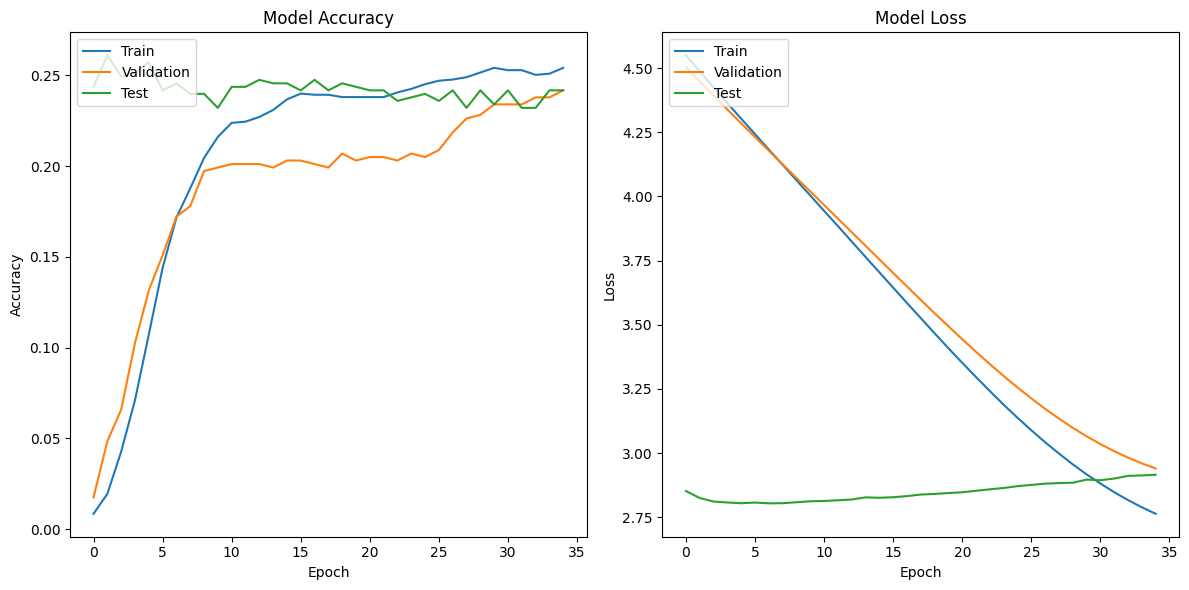

In [1125]:
test_accs = []
test_losses = []

for epoch in range(35):  # replace with your number of epochs
    model.fit(train_x_std, train_y, epochs=1, batch_size=100)
    loss, acc = model.evaluate(test_x_std, test_y, verbose=0)
    test_accs.append(acc)
    test_losses.append(loss)

# Plotting
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(test_accs)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(test_losses)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [1126]:
# Print Precision, Recall and F1-Score
print(classification_report(val_y, predicted_classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         5
          25       0.10    

C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344

In [1127]:
# Compute confusion matrix
cm = confusion_matrix(test_y, predicted_classes)

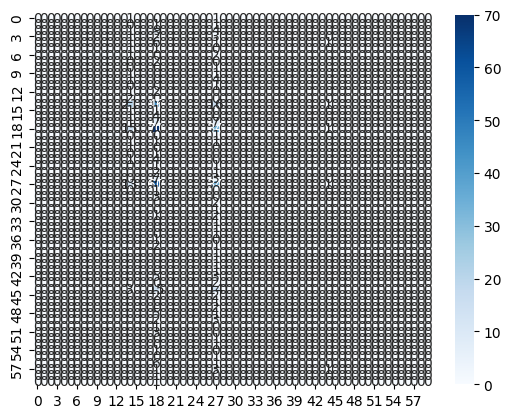

In [1128]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [1129]:
n_classes = len(np.unique(test_y_std))

In [1130]:
# Binarize the output
y_test_bin = label_binarize(test_y, classes=np.arange(n_classes))
y_pred_bin = y_pred

In [1131]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\terre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\

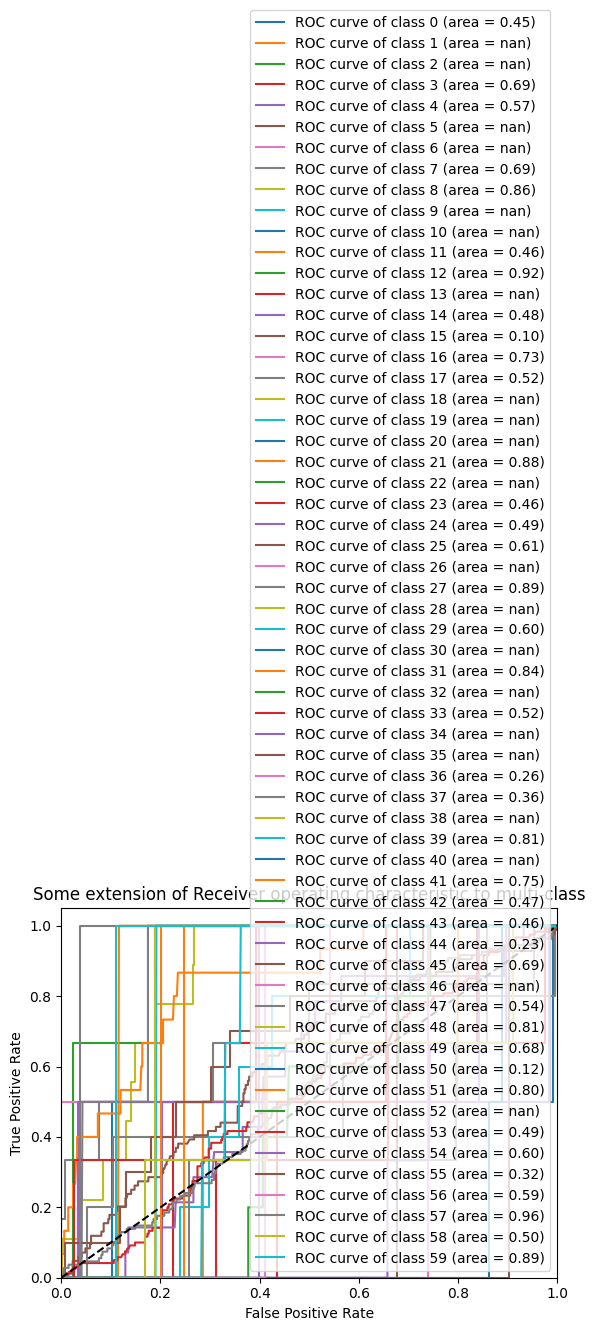

In [1132]:
# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [1133]:
def get_top_5_predictions(model, x, actual_y, encoder):
    # Find the indices of top 5 actual jobs
    print(f"The top job: {encoder.inverse_transform(actual_y.reshape(1,))}")

    # Predict the top 5 job titles
    preds = model.predict(np.reshape(x, (1, -1)))
    top_preds = pd.DataFrame(columns=['prediction'], index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = encoder.inverse_transform(sorted_index[i].reshape(1,))
        top_preds.loc[i+1, 'prediction'] = ith_pred
    return top_preds

In [1134]:
def random_index(upper_bound):
    return random.randint(0, upper_bound)
random_idx = random_index(val_x_std.shape[0] - 1)
get_top_5_predictions(model, val_x_std[random_idx], val_y.iloc[random_idx], encoders['job_title'])

The top job: ['Data Scientist']
1/1 [==============================] - 0s 15ms/step


,prediction
1,[Data Engineer]
2,[Machine Learning Engineer]
3,[Data Scientist]
4,[Research Scientist]
5,[Research Engineer]
